## Energy Requirement Prediction

**Name:** Rahul Prem

**Problem Statement:** Given a dataset of energy consumed every hour for the years 2010 - 2018, arrive at an approach which will help us predict the energy requirement for a day in the future.

**Data Source:** https://drive.google.com/file/d/1mm00jiXg8kQ6xZeAUk5qbcR3gRYeV54q/view?usp=sharing

**Data Columns:** date_and_time (yyyy-mm-dd-hh), power_MWH

Let us get started by firstly importing the data into a pandas dataframe using the read_csv() function.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Structured Data Analysis

This section will deal with two parts, namely:
1. **Visualization and statistical exploration of data -** while visualizations provide visual representations in a quick and intuitive manner to explore the data, identify patterns and detect trends/irregularities, statistics offers a way to quanity these insights. Thus the two are intertwined and we will explore both in an integrated manner in this section.

2. **Issues and Challenges -** This part will discuss the issues with this energy consumption data that makes this problem challenging and will be corrorborated with relevant evidence.

In [2]:
import pandas as pd

#Read the data from the .csv file

df = pd.read_csv('/content/drive/MyDrive/Energy Requirement Prediction/power_data.csv',
                 parse_dates=['Datetime'],
                 index_col=['Datetime'])
df

,Unnamed: 0,Power_MWH
Datetime,,
1/1/2010 0:00,0,31647
31/12/2010 1:00,1,29634
31/12/2010 2:00,2,28614
31/12/2010 3:00,3,28146
31/12/2010 4:00,4,28051
...,...,...
1/1/2018 20:00,75250,44284
1/1/2018 21:00,75251,43751
1/1/2018 22:00,75252,42402


From the above data, we see the following three columns:
- An unnamed column with indexes that we would need to delete
- The datetime of power consumption which we have parsed as date value in read_csv()
- The volume of power consumption in MWh

First let us delete the unnamed column.

In [3]:
#Delete the first column

df = df.iloc[:,1:]
df

,Power_MWH
Datetime,
1/1/2010 0:00,31647
31/12/2010 1:00,29634
31/12/2010 2:00,28614
31/12/2010 3:00,28146
31/12/2010 4:00,28051
...,...
1/1/2018 20:00,44284
1/1/2018 21:00,43751
1/1/2018 22:00,42402


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75255 entries, 1/1/2010 0:00 to 2/1/2018 0:00
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Power_MWH  75255 non-null  int64
dtypes: int64(1)
memory usage: 1.1+ MB


**Handling Missing Values**

The above information confirms that we have 75255 rows and all are non-null content. We can confirm the absense of null values through the code below.

In [5]:
df.isnull().sum()

Power_MWH    0
dtype: int64

Now that we don't have any null values, we can move on to the structured data analysis and getting a better understanding of the nature of our time series data. The best way to do this is by firstly visualizing our data.

**Visualization and Statistical Exploration**

Text(0, 0.5, 'Energy Consumed (MWh)')

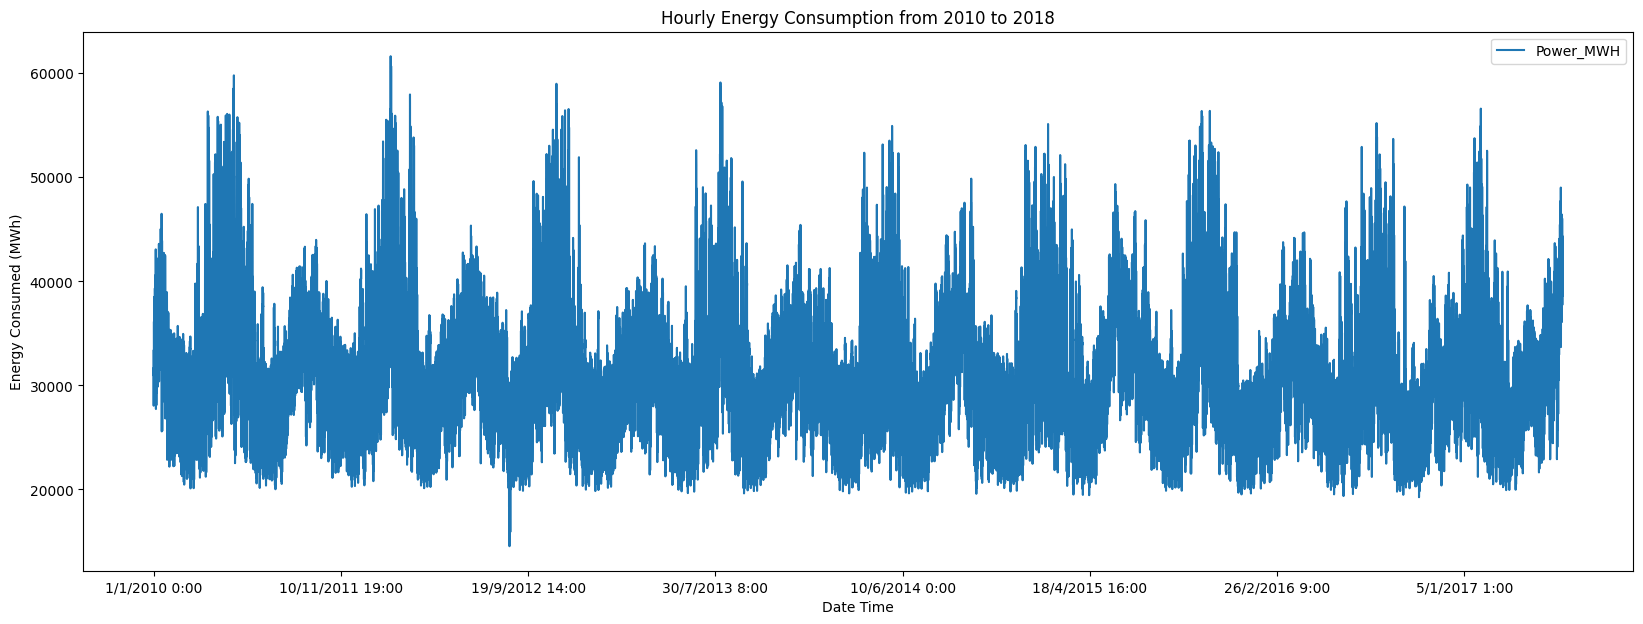

In [6]:
import matplotlib.pyplot as plt

#plot the hourly energy consumption data from 2010 to 2018

df.plot(figsize = (20,7)) #by default pandas will send index as x-axis and column(s) as y-axis
plt.title('Hourly Energy Consumption from 2010 to 2018')
plt.xlabel('Date Time')
plt.ylabel('Energy Consumed (MWh)')

**From the above graph, we can visually determine that the data is quite noisy. This is characterised by irregular spikes and drops that do not follow any particular pattern or trend.**

Some ways to **overcome** this noise would be:
1. **Smoothing Techniques:** As the name suggests, these techniques are meant to 'smoothen' the erratic spikes and drops in our data, thereby revealing the underlying trends and patterns that prevail in our data.

  An example of a smoothing technique is the moving average method. It requires us to define the window size to consider, which is in turn used as the number of raw observations used to calculate the moving average value. This window is then made to 'slide' across the entire time series.

  Consider the window size = 3.There are two types of moving average - centred moving average and trailing moving average. If t is the current value, the centred moving avg considers average of t-1, t and t+1 whereas the trailing moving avg considers average of t, t-1 and t-2.

  Another example of Smoothing technique is the exponential smoothing technique that uses exponential functions to assign exponentially decreasing weights over time, as opposed to moving average that gives equal weights to past observations.

2. **Filtering:** This technique essentially refers to allowing only signals of a frequency lower than the cut-off frequency to pass through, thereby reducing the high-frequency noise.

3. **Transformation Techniques:** This process involves adding some transformation methods to reduce noise in the dataset. Each transformation may serve a different purpose.
  For Example, the log transformation technique reduces the impact of large outliers by compressing the range of the data. The differencing method on the other hand removes trends and seasonality to stabilise the mean of the time series.

4. **Aggregation Techniques:** By aggregating the hourly data over 2010 to 2018 into daily, weekly or monthly data, we can significantly reduce the noise.

Based on the above methods, we realise that our data might need a combination of one or more noise reduction techniques to be applied. However, we will **code only one of them**.

Note that the problem statement requires us to predict the energy requirement for a day in the future. So it would be beneficial to aggregate the energy consumed over 24 hours in each day into a single value per day. **This aggregation method is also a significant way of reducing the noise in our data. Hence we will use Aggregation technique as our preferred technique to reduce noise in the data.** This can be done in three ways:
- Sum : add up the energy consumption of each of the 24 hours into 1 summed up value per day
- Mean: calculate the average hourly energy consumption per day
- Median: consider the central tendency of hourly consumption per day

For our use case, since we want to predict the overall daily energy consumption, it would be beneficial to consider the **Sum** of all hourly energy consumptions.

In order to aggregate the `Datetime` index column, we need to first ensure it's of Datetime type.

In [7]:
print(type(df.index))

<class 'pandas.core.indexes.base.Index'>


It is not Datetime type yet. Let us convert it by specifying the format d/m/Y H:M.

In [8]:
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index, format='%d/%m/%Y %H:%M')

In [9]:
print(type(df.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


Now that we have converted to DatetimeIndex type, let us resample our data by summing up hourly consumption.

In [10]:
#Resample the data to a daily level by summing up the hourly consumption
daily_data = df.resample('D').sum()

In [11]:
daily_data

,Power_MWH
Datetime,
2010-01-01,750586
2010-01-02,837421
2010-01-03,910921
2010-01-04,933310
2010-01-05,915793
...,...
2018-07-30,790978
2018-07-31,828938
2018-08-01,941539


The number of columns significantly reduce when we perform the aggregation method to 3137 rows.

Let us check the stats of this daily energy consumption.

In [12]:
daily_data.describe().round(2)

,Power_MWH
count,3137.00
mean,761183.66
std,116079.45
min,35486.00
25%,673342.00
50%,742739.00
75%,835124.00
max,1247699.00


The above statistical exploration tells us that:
- There are 3137 daily energy consumption values
- The average daily energy consumption is 761183.66 MWh
- The average deviation of data points from the mean indicating the degree of variability/spread is 116079.45 MWh
- The range of the daily energy consumption varies from a minimum of 35486 MWh to a maximum of 1247699.00 MWh

**Let us now visualise the daily energy consumption data and see if this reduced the noise.**

Text(0, 0.5, 'Energy Consumed (MWh)')

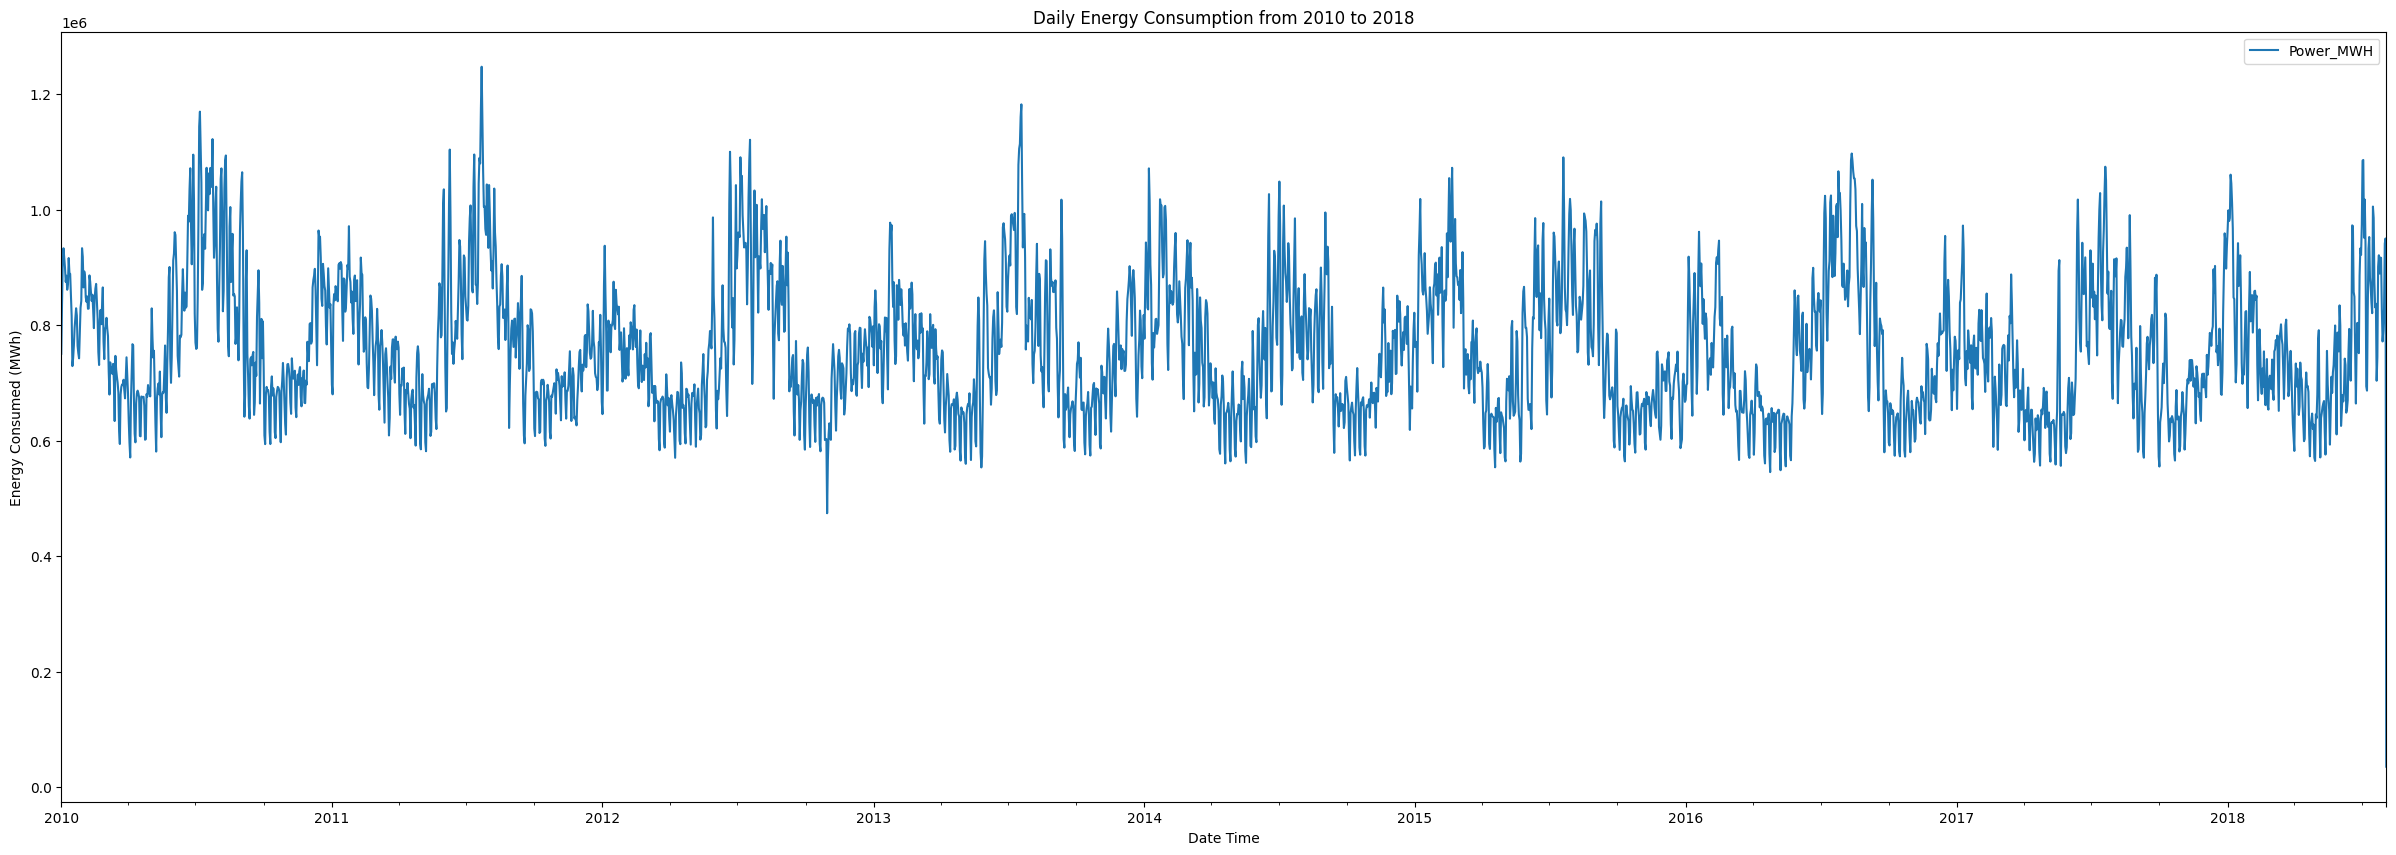

In [13]:
import matplotlib.pyplot as plt
daily_data.plot(figsize = (30,10))
plt.title('Daily Energy Consumption from 2010 to 2018')
plt.xlabel('Date Time')
plt.ylabel('Energy Consumed (MWh)')

From the above plot, we see that the noise has significantly reduced by aggregating the data.


Let us now move on to do some visual exploratory analysis on our data using one of the following techniques:

1. **Time Series Decomposition:**  In this technique, we will essentially decompose the time series into its constituent components (trend, seasonality, and residuals) to understand underlying patterns. This will help us identify long-term trends, seasonal patterns, and any remaining noise or irregularities in the data.

2. **Autocorrelation Analysis:** Plot autocorrelation and partial autocorrelation functions to identify lagged relationships and dependencies within the data. This can help you understand how each observation is related to its past values and identify any recurring patterns or cycles.

3. **Outlier Detection:** Identify and visualize outliers or extreme values in the data to understand their impact on the overall pattern. This will help you identify any unusual or anomalous observations that may need to be investigated further.

All the above are great methods to do visual exploratory analysis, however we will **only code one of them**. Since our end goal is to predict the energy consumption for a later day, it would be useful to know and understand the trend, seasonal, and residual components. This will help gain insights into the underlying patterns and dynamics of the data and this understanding can in turn inform the development of predictive models that take into account the historical trends, seasonal patterns, and residual fluctuations to make accurate forecasts of power consumption for future days.

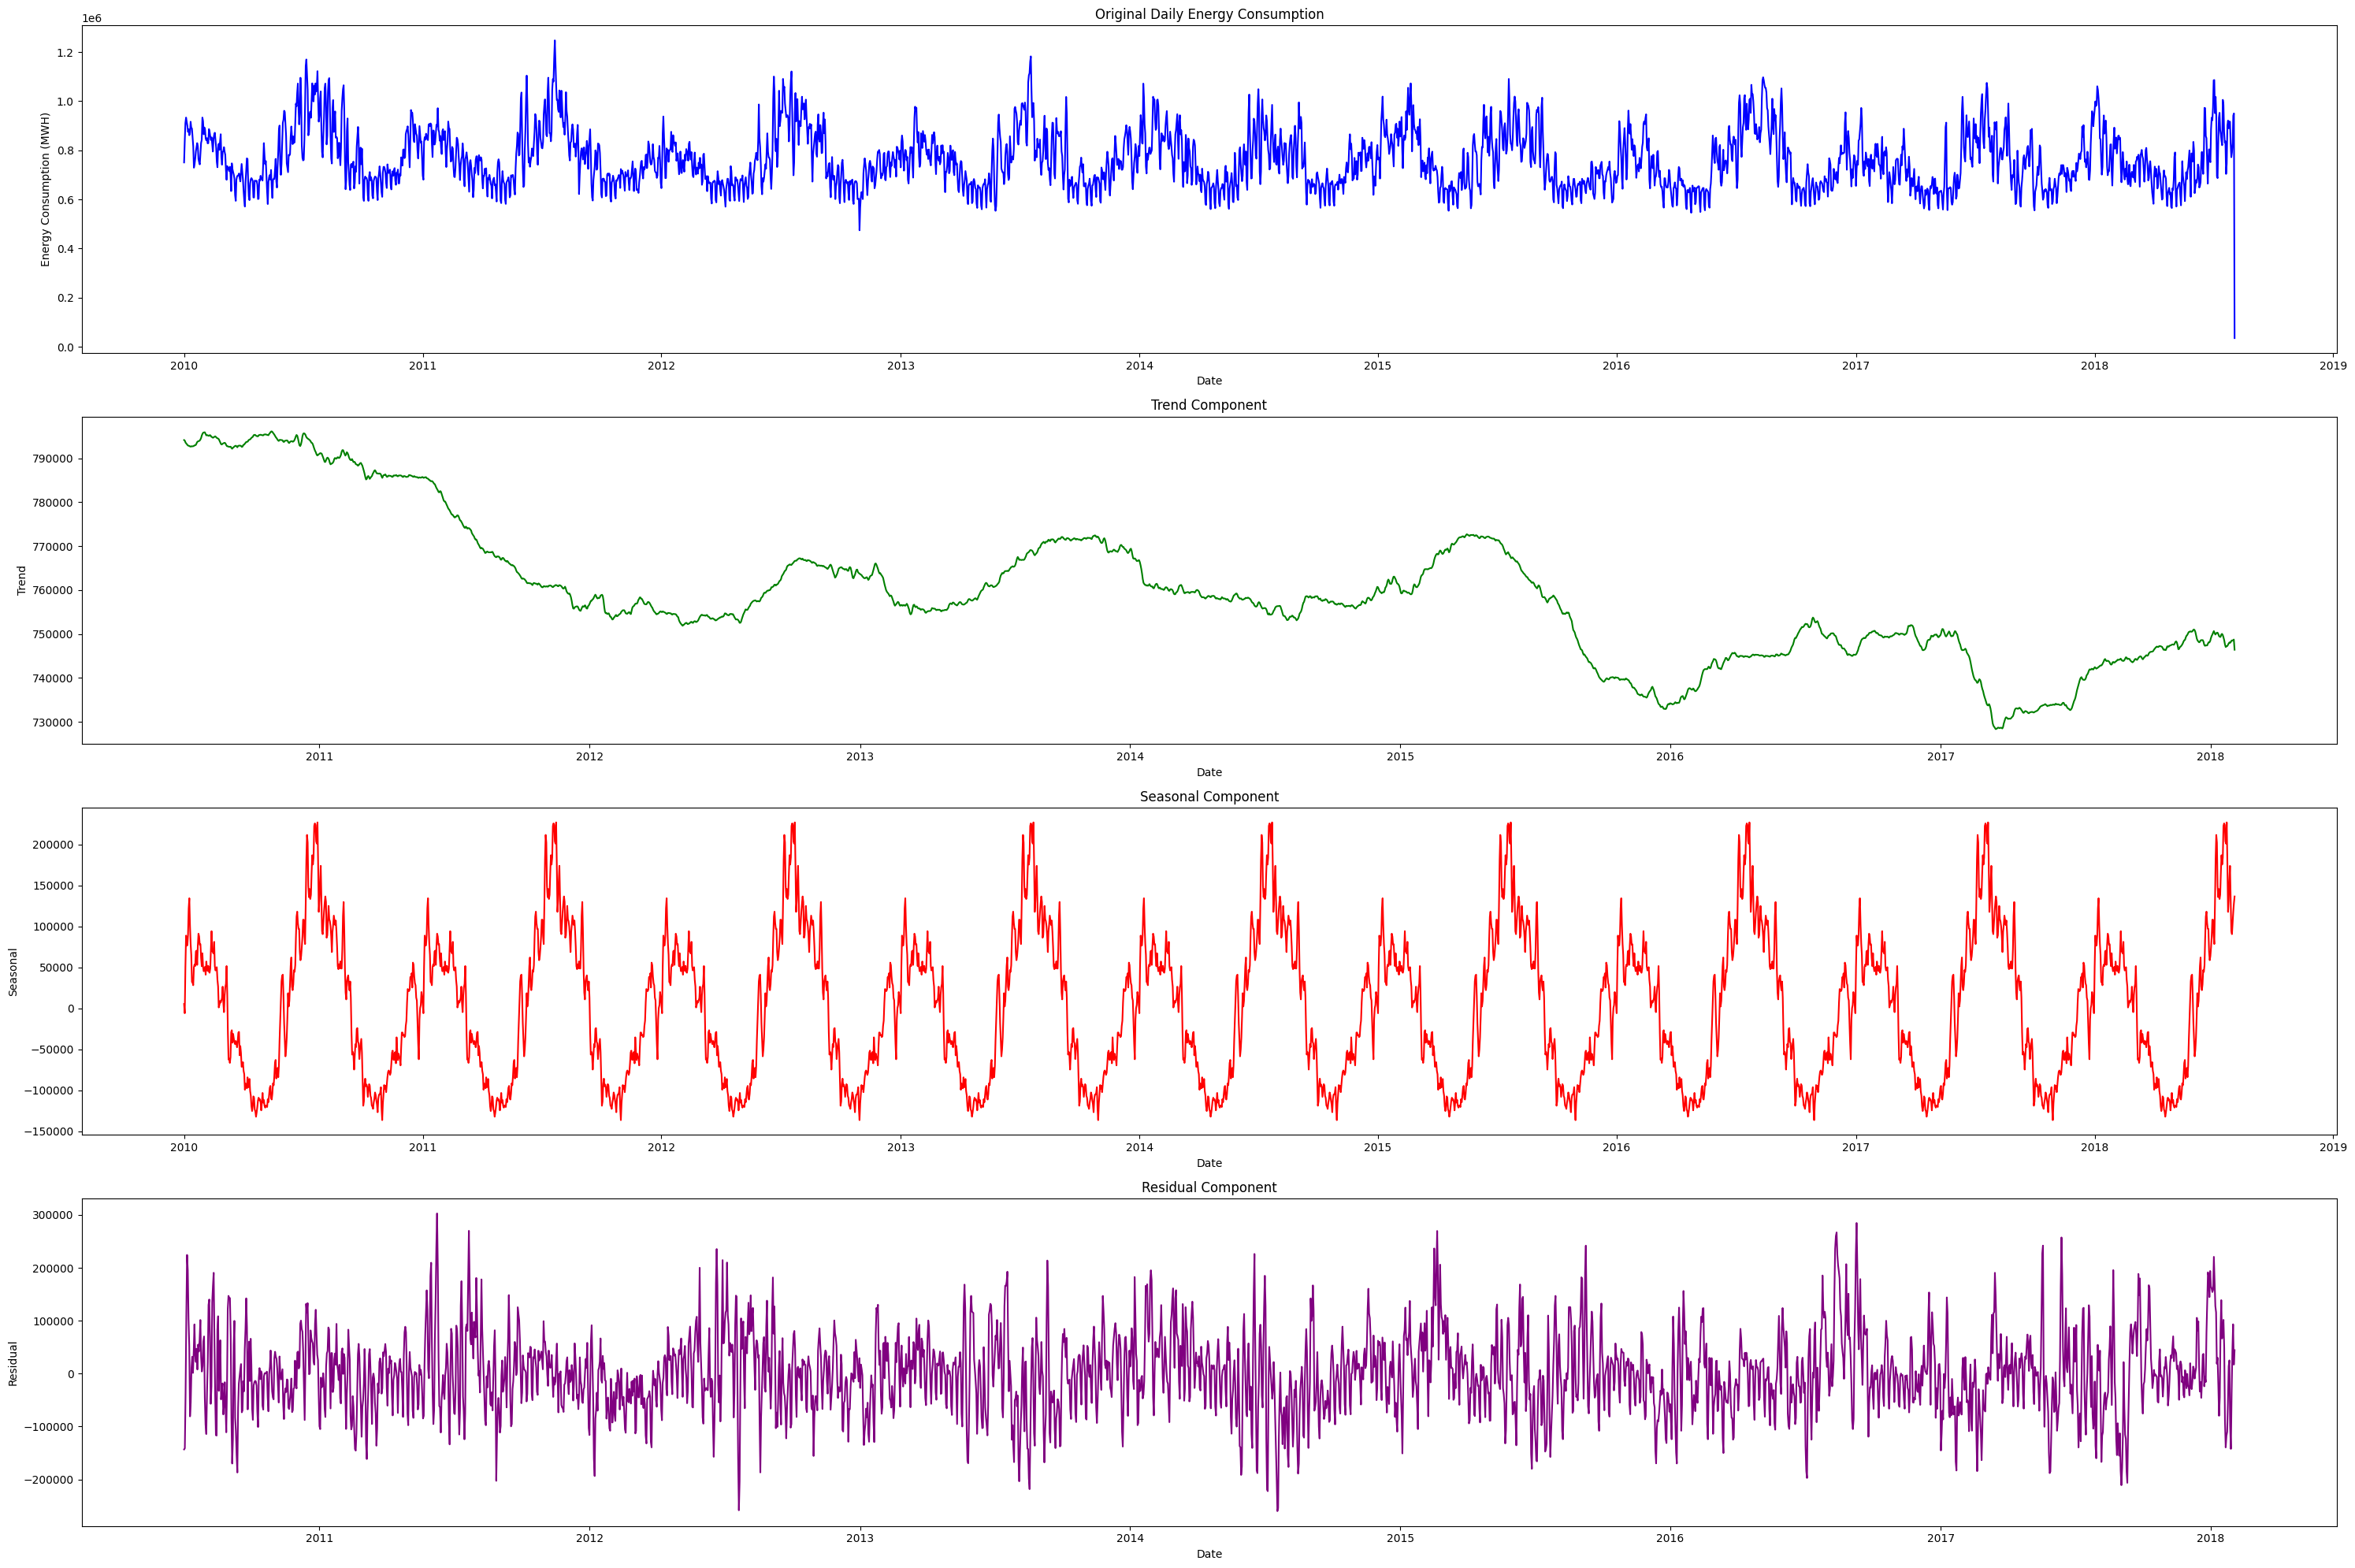

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

#time series decomposition
result = seasonal_decompose(daily_data['Power_MWH'], model='additive', period=365)

#Plot the decomposition components
plt.figure(figsize=(30, 20))

#Original time series
plt.subplot(411)
plt.plot(daily_data.index, daily_data['Power_MWH'], label='Original Data', color='blue')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (MWH)')
plt.title('Original Daily Energy Consumption')

#Trend component
plt.subplot(412)
plt.plot(result.trend, label='Trend', color='green')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.title('Trend Component')

#Seasonal component
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color='red')
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.title('Seasonal Component')

#Residual component
plt.subplot(414)
plt.plot(result.resid, label='Residual', color='purple')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


The above time series decomposition is very informative and gives us the following insights under various components:
1. **Trend Component:**
- The trend line shows an overall decreasing pattern in power consumption from 2011 to 2018, indicating a gradual reduction in energy usage over time.
- There are noticeable fluctuations in the trend line which suggest that the decrease in power consumption is not a steady or linear process but rather exhibits periods of increase and decrease within the overall declining trend.
- The energy consumption seems to peak in the year 2010 and is the lowest in early 2017. However, after that we once again witness a slight increasing trend as per the plot.


2. **Seasonal Component:**
- The seasonal component exhibits a clear cyclical pattern each year and throughout the years 2010 to 2018.
- There are distinct peak periods within each year, indicating higher energy consumption during certain times of the year. Similarly, there are trough periods within each year, representing lower energy consumption levels. These peaks and troughs seem to follow a consistent pattern across years.
- The amplitude, or the difference between the peak and trough values, appears to be relatively consistent across years. This implies that the magnitude of the seasonal fluctuations remains stable over time.


3. **Residual Component:**

- The residual component exhibits a pattern of random fluctuations around the zero line, indicating that there is inherent noise or randomness in the data that cannot be explained by the seasonal or trend components alone.
- These seem to have varying amplitude as well.




**Statistical Tests to detect Issues/Challenges**

In order to detect if there are any issues/challenges with the data, we can perform statistical tests such as Augmented Dickey-Fuller (ADF) test, outliers test and so on.

In [15]:
#Perform ADF test

from statsmodels.tsa.stattools import adfuller

result = adfuller(daily_data['Power_MWH'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

ADF Statistic: -6.378451
p-value: 0.000000
Critical Values:
1%: -3.43245576226643
5%: -2.8624703946061567
10%: -2.567265271491845


The null hypothesis in the ADF test is that the data is non-stationary.
From the above ADF test, we can confirm that:
- The ADF statistic is much more negative than at all the three critical value thresholds.
- The p-value is much lesser than 0.05.

These two reasons allow us to safely **reject the null hypothesis** and conclude that **our data is stationary**, thereby exhibiting fairly constant mean and variance across the time series.


**Issues and Challenges**

Now that we have done a detailed visual and statistical analysis on our data, let us move onto addressing the issues and challenges that may make our problem a challenging one.

1. **External Factors:** The data currently contains only two columns - Datetime and Power_MWH. It does not take into account external factors such as inflation, global issues, government interventions, etc. Thus our predictive model may not be a well informed one.

2. **Noisy Data:** Note that we have only applied aggregation so far to tackle noise reduction. There is still persistent noisy data that will require us to apply certain further techniques such as smoothing techniques, transformations, etc.

3. **Limited Data:** Once we aggregated hourly data into daily data, our data reduced exponentially from 75255 to 3137 rows. This limited data might not be sufficient to train our model and make credible predictions for energy consumption for a day in the future.

4. **Residuals:** The residuals plot above hint at the presence of **outliers** that we may need to deal with. The ADF test proved stationarity but not absence of outliers. We will need to use z-scores, boxplots, etc. to detect and treat them.

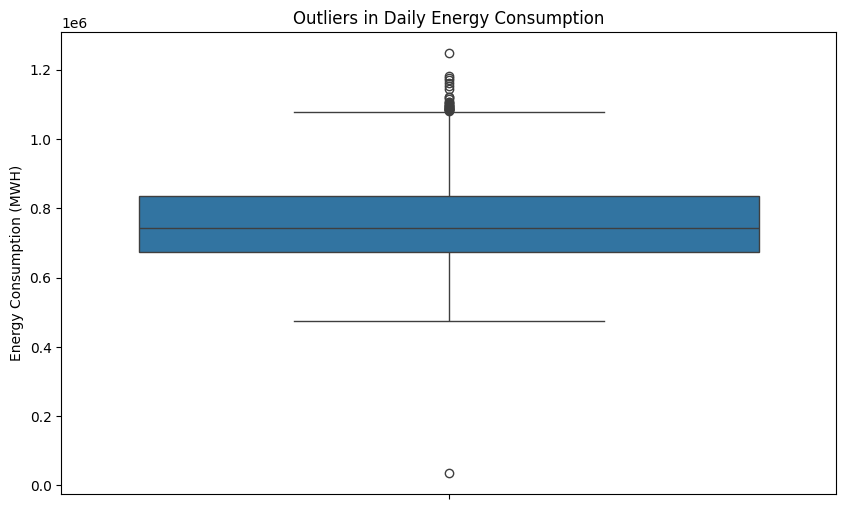

In [16]:
#Detect outliers using a boxplot

import seaborn as sns

# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=daily_data['Power_MWH'])
plt.title('Outliers in Daily Energy Consumption')
plt.ylabel('Energy Consumption (MWH)')
plt.show()


The above boxplot shows that there are some outliers outside the whiskers. These need to be dealt with.

In [17]:
#Detect the outliers visualized above

import numpy as np

#Calculate z-scores
daily_data['z_score'] = (daily_data['Power_MWH'] - daily_data['Power_MWH'].mean()) / daily_data['Power_MWH'].std()

outliers = daily_data[np.abs(daily_data['z_score']) > 3]

outliers

,Power_MWH,z_score
Datetime,,
2010-07-06,1143990,3.297796
2010-07-07,1169897,3.520979
2010-07-24,1122349,3.111363
2011-07-21,1175477,3.569050
2011-07-22,1247699,4.191227
2011-07-23,1151439,3.361967
2012-07-18,1121169,3.101198
2013-07-17,1113913,3.038689
2013-07-18,1160801,3.442619


We have detected the outliers above. We can deal with them accordingly in the upcoming feature engineering section.

## Feature Engineering



In this section, we will primarily work on two aspects:
1. Extracting new features from our existing data so as to improve the predictive capability of our model.
2. Getting statistical justification for selecting these features.

But before delving into these, let us first remove the outliers that we detected above so as to ensure a better predictive model.

In [18]:
outliers.index

DatetimeIndex(['2010-07-06', '2010-07-07', '2010-07-24', '2011-07-21',
               '2011-07-22', '2011-07-23', '2012-07-18', '2013-07-17',
               '2013-07-18', '2013-07-19', '2018-08-03'],
              dtype='datetime64[ns]', name='Datetime', freq=None)

In [19]:
outlier_indices = outliers.index  #This will return the dates '2010-07-06', '2010-07-07', '2010-07-24' ...

#Drop the outliers
daily_data_no_outliers = daily_data.drop(outlier_indices)

daily_data_no_outliers

,Power_MWH,z_score
Datetime,,
2010-01-01,750586,-0.091297
2010-01-02,837421,0.656769
2010-01-03,910921,1.289956
2010-01-04,933310,1.482832
2010-01-05,915793,1.331927
...,...,...
2018-07-29,771910,0.092405
2018-07-30,790978,0.256672
2018-07-31,828938,0.583689


We only needed z-score column to detect outliers and do not need it anymore, so let's remove it.

In [20]:
#drop z-score column
daily_data_no_outliers = daily_data_no_outliers.drop(columns=['z_score'])

daily_data_no_outliers

,Power_MWH
Datetime,
2010-01-01,750586
2010-01-02,837421
2010-01-03,910921
2010-01-04,933310
2010-01-05,915793
...,...
2018-07-29,771910
2018-07-30,790978
2018-07-31,828938


**Feature Extraction and Statistical Reasoning**

Now let's dive into the first aspect of this section which is feature extraction.

It would be better to functionise this part so that in future when we want to make predictions for a particular date, we can automatically call this function and extract features from the date and make predictions of its energy consumption using our trained model.

In [21]:
def feature_extraction_func(df):
    """
    Extract features from the time series data frame based on the index that is Datetime.
    df - a timeseries dataframe
    """
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df


In [22]:
df2 = feature_extraction_func(daily_data_no_outliers)
df2

,Power_MWH,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,
2010-01-01,750586,4,1,1,2010,1,1,53
2010-01-02,837421,5,1,1,2010,2,2,53
2010-01-03,910921,6,1,1,2010,3,3,53
2010-01-04,933310,0,1,1,2010,4,4,1
2010-01-05,915793,1,1,1,2010,5,5,1
...,...,...,...,...,...,...,...,...
2018-07-29,771910,6,3,7,2018,210,29,30
2018-07-30,790978,0,3,7,2018,211,30,31
2018-07-31,828938,1,3,7,2018,212,31,31


After evaluating significance and usefulness in making predictions, I have chosen the following features to extract from the Datetime index:

1. **dayofweek:** This feature has values from 0 to 6, with 0 representing Monday and 6 representing Sunday. Using `dayofweek` to predict the power consumption for a particular day can be useful since it may capture the patterns in power consumption on certain days of the week and relative inactivity and lower consumption on other days.

  For example, Monday to Friday are generally working days for businesses and hence the power consumption might be higher whereas Saturday and Sunday are holidays so it might be relatively lower.

  Let us try to give statistical reasoning for this by calculating the mean energy consumption for each day of the week.



In [23]:
#Group data by day of week and calculate average power consumed

mean_energy_by_day = df2.groupby('dayofweek')['Power_MWH'].mean()

mean_energy_by_day

dayofweek
0    773604.736607
1    787114.020134
2    786100.402247
3    782914.818386
4    772760.354260
5    716519.365471
6    702187.689732
Name: Power_MWH, dtype: float64

From the above values we can see that the mean is lesser for Saturday and Sunday. Let us perform the ANOVA test to confirm that there is a significant difference in mean power consumption across different days of the week. We might re-use this for other features, so let us functionise it.

In [24]:
#ANOVA Test

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [25]:
def anova_test(df, label, feature):
    """
    This function performs an ANOVA test and returns the p-value.

    Parameters:
    - df: The DataFrame containing the data
    - label: The name of the dependent variable
    - feature: The name of the independent variable (

    Returns:
    - p_value: The p-value of the ANOVA test
    """
    model = ols(f'{label} ~ C({feature})', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    p_value = anova_table['PR(>F)'][f'C({feature})']

    return p_value

In [26]:
print('p-value for dayofweek:', anova_test(df2, 'Power_MWH', 'dayofweek'))

p-value for dayofweek: 4.776082305342419e-56


The above p-value from the ANOVA test is very much smaller than 0.05, which corrorborates our rejection of the null hypothesis. Thus there is a significant difference between the average power consumption across different days of the week.

Let us visualise this to see if there is a significant difference.

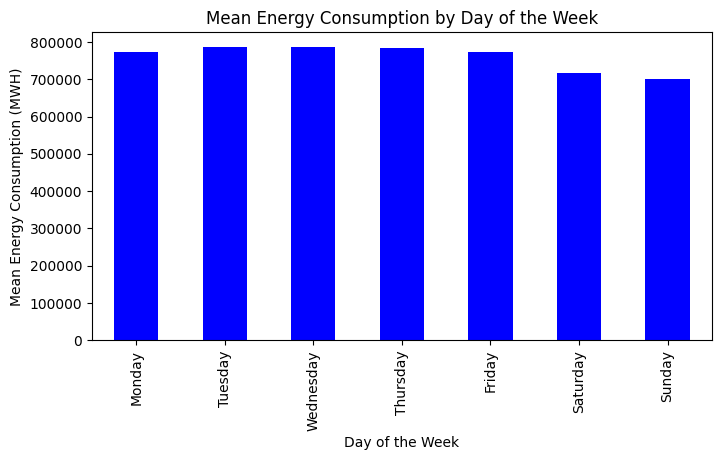

In [27]:
plt.figure(figsize=(8, 4))
mean_energy_by_day.plot(kind='bar', color='blue')
plt.title('Mean Energy Consumption by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Energy Consumption (MWH)')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

As we can see from above, the power consumption is slightly lower on Saturday and Sunday.

**2. quarter:** This feature ranges from 1 to 4 with 1 representing Q1 quarter and 4 representing Q4 quarter. There might be seasonal variations and variations in economic activity across the 4 quarters with some of them being busier than the others, thereby having higher power consumption.

We have already seen this in the seasonal component of the time series decomposition earlier. However, let us reaffirm it by statistical methods.

In [28]:
#Group data by quarter and calculate average power consumed

mean_energy_by_quarter = df2.groupby('quarter')['Power_MWH'].mean()

mean_energy_by_quarter

quarter
1    782825.256158
2    714194.471306
3    838727.346509
4    705210.572011
Name: Power_MWH, dtype: float64

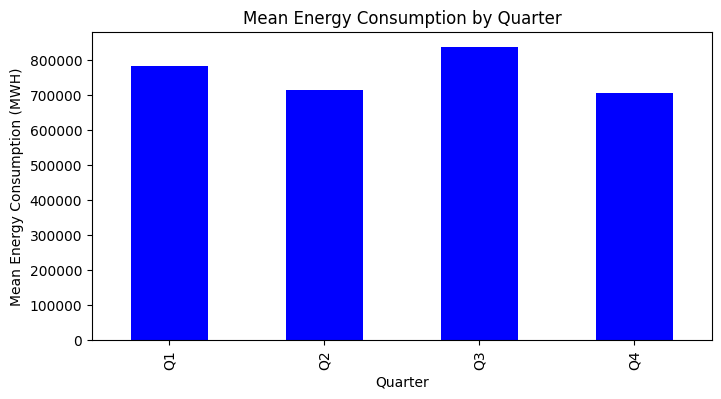

In [29]:
plt.figure(figsize=(8, 4))
mean_energy_by_quarter.plot(kind='bar', color='blue')
plt.title('Mean Energy Consumption by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Mean Energy Consumption (MWH)')
plt.xticks(range(4), ['Q1', 'Q2', 'Q3', 'Q4'])
plt.show()

In [30]:
print('p-value for quarter:', anova_test(df2, 'Power_MWH', 'quarter'))

p-value for quarter: 9.205260631657689e-173


The above visualisation reveals that the energy consumption is relatively higher in Q1 and Q3 than in Q2 and Q4. The p-value indicates that there is a significant difference in mean values of power consumption across different quarters.

3. **month:** It is very common for few months to have a surge in power consumption whereas few months have a dip. This column ranging from 1 to 12 (1 for January and 2 for December) will help in capturing these monthly trends and making better predictions with our model.

  Let us plot the average consumption per month as well as plot a box plot to give statistical reasoning for this feature.

In [31]:
#Group data by month and calculate average power consumed

mean_energy_by_month = df2.groupby('month')['Power_MWH'].mean()

mean_energy_by_month

month
1     826110.458781
2     798224.708661
3     725520.480287
4     652925.374074
5     685387.738351
6     805230.525926
7     905355.282528
8     853408.752000
9     748755.404167
10    653367.641129
11    693397.795833
12    768485.221774
Name: Power_MWH, dtype: float64

In [32]:
print('p-value for month:', anova_test(df2, 'Power_MWH', 'month'))

p-value for month: 0.0


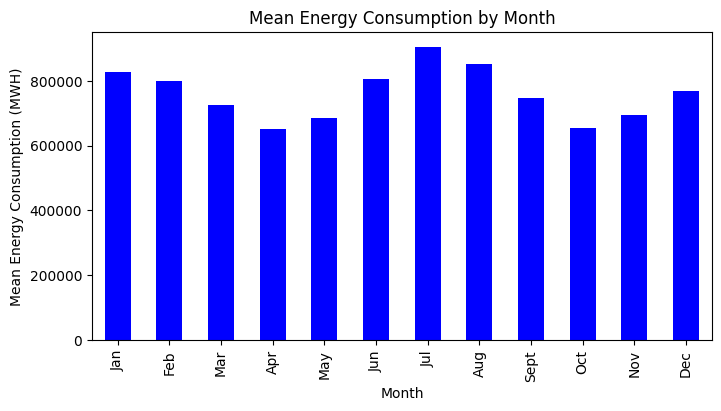

In [33]:
plt.figure(figsize=(8, 4))
mean_energy_by_month.plot(kind='bar', color='blue')
plt.title('Mean Energy Consumption by Month')
plt.xlabel('Month')
plt.ylabel('Mean Energy Consumption (MWH)')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
plt.show()

As we can see from above, there is a dip in energy consumption in the months of April and October whereas there is a significant surge in July. This might be due to the increased use of cooling appliances due to humid conditions in these months and so on.
Let us reaffirm this with a box plot.

<ipython-input-34-03f3b8115bf9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df2, x='month', y='Power_MWH', palette='Blues')


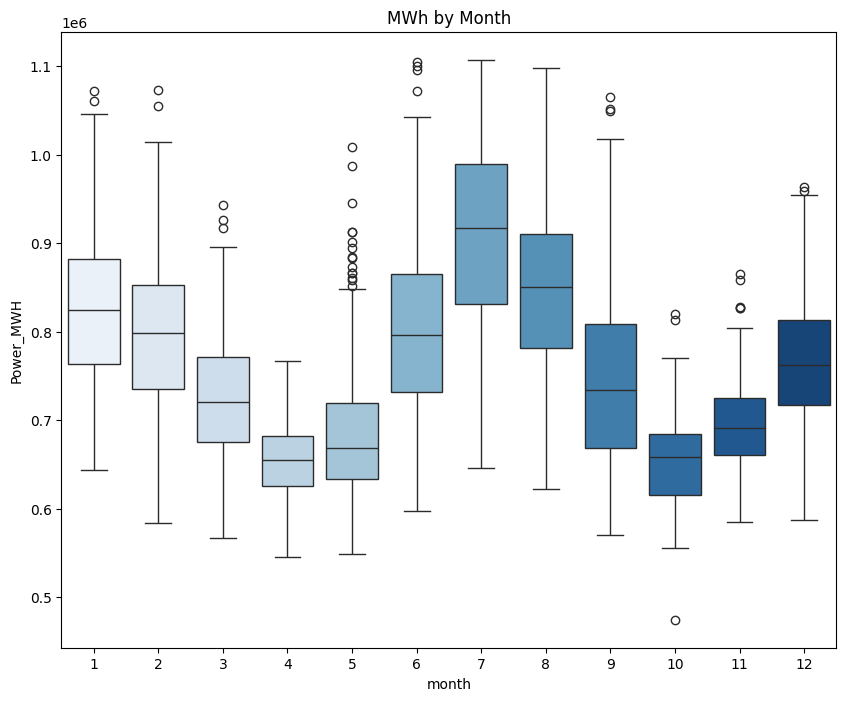

In [34]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df2, x='month', y='Power_MWH', palette='Blues')
ax.set_title('MWh by Month')
plt.show()

**4. year:** This feature ranges from 2010 to 2018 and essentially captures the yearly trends of energy consumption that might vary due to external factors such as population growth, economic growth and so on. For example, the year 2020 might have seen a spike in energy consumtion due to the COVID-19 pandemic that caused a significant upsurge in the use of ventilators and other appliances that were needed to support patient care.

Let us confirm this with statistical reasoning.

<ipython-input-35-d70b74524c63>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df2, x='year', y='Power_MWH', palette='Blues')


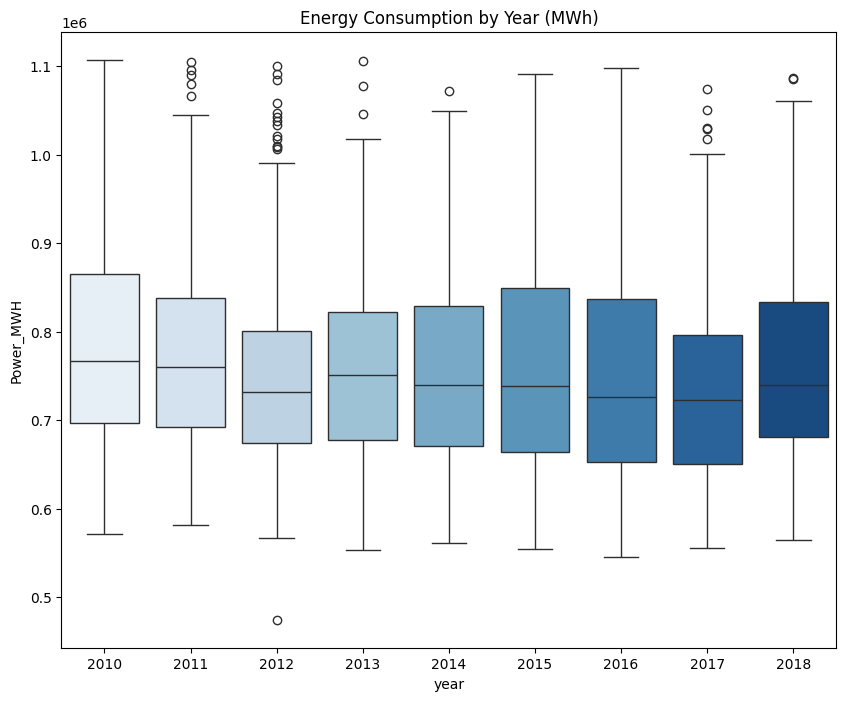

In [35]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df2, x='year', y='Power_MWH', palette='Blues')
ax.set_title('Energy Consumption by Year (MWh)')
plt.show()

In [36]:
#Group data by year and calculate average power consumed

mean_energy_by_year = df2.groupby('year')['Power_MWH'].mean()

mean_energy_by_year

year
2010    791245.118785
2011    773223.842541
2012    753385.898630
2013    757537.372928
2014    755913.767123
2015    761025.460274
2016    752107.994536
2017    735621.879452
2018    762616.546729
Name: Power_MWH, dtype: float64

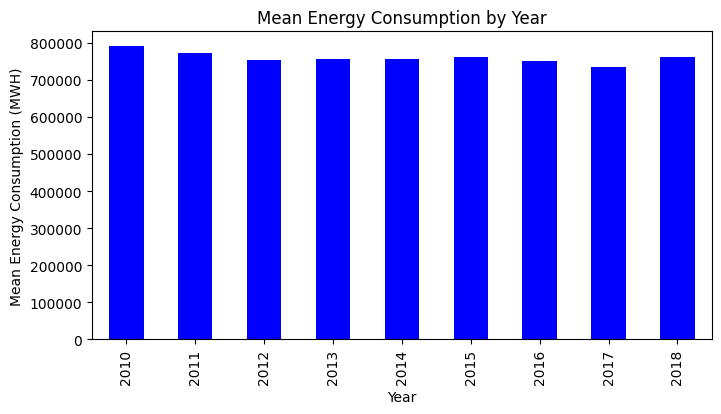

In [37]:
plt.figure(figsize=(8, 4))
mean_energy_by_year.plot(kind='bar', color='blue')
plt.title('Mean Energy Consumption by Year')
plt.xlabel('Year')
plt.ylabel('Mean Energy Consumption (MWH)')
plt.xticks(range(9), ['2010', '2011', '2012', '2013','2014','2015','2016','2017','2018'])
plt.show()

In [38]:
#ANOVA Test

print('p-value for year:', anova_test(df2, 'Power_MWH', 'year'))

p-value for year: 8.568236762630212e-09


The above p-value from the ANOVA test provides strong evidence to suggest that average power consumption is not the same across all the years from 2010 to 2018. There is a significant difference.

**5. dayofyear:** Ranges from 1 to 365 (Jan 1st to Dec 31st) and attempts to identify more granular patterns in energy consumption such as public holidays or other events that repeat every year and so on.


In [39]:
#Group data by day of year and calculate average power consumed

mean_energy_by_doy = df2.groupby('dayofyear')['Power_MWH'].mean()

mean_energy_by_doy

dayofyear
1      739289.000000
2      792406.666667
3      846964.444444
4      856218.111111
5      868968.444444
           ...      
362    772134.750000
363    786501.250000
364    790076.125000
365    776168.375000
366    769789.500000
Name: Power_MWH, Length: 366, dtype: float64

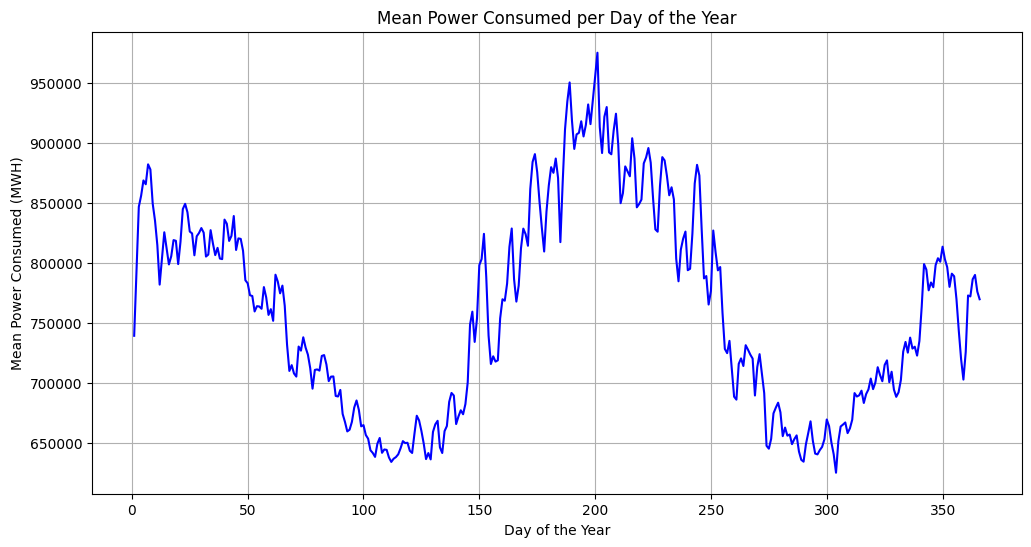

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(mean_energy_by_doy, color='blue')
plt.title('Mean Power Consumed per Day of the Year')
plt.xlabel('Day of the Year')
plt.ylabel('Mean Power Consumed (MWH)')
plt.grid(True)
plt.show()

From the above graph we can clearly see a spike in energy consumption on particular days of the year.

In [41]:
print('p-value for dayofyear:', anova_test(df2, 'Power_MWH', 'dayofyear'))

p-value for dayofyear: 8.166658421413028e-297


The p-value from the ANOVA test reaffirms our conclusion.

**6. dayofmonth:** Ranges from 1 to 31 with changes for few months. Certain days of the month might have higher power consumption compared to the others due to monthly events such as pay days, billing cycles, and so on. This feature will attempt to capture any such patterns in our data.


In [42]:
#Group data by day of month and calculate average power consumed

mean_energy_by_dom = df2.groupby('dayofmonth')['Power_MWH'].mean()

mean_energy_by_dom

dayofmonth
1     759302.067308
2     761009.567308
3     762717.796117
4     758853.553398
5     764021.961165
6     761410.960784
7     762359.735294
8     768810.873786
9     767403.029126
10    764641.135922
11    765071.893204
12    759311.310680
13    761734.058252
14    756325.446602
15    755076.203883
16    758206.194175
17    757995.029412
18    757498.207921
19    762812.245098
20    762167.631068
21    759961.205882
22    756931.598039
23    755513.117647
24    751563.578431
25    747676.495146
26    756173.407767
27    760964.407767
28    760454.689320
29    758180.208333
30    756017.393617
31    783267.866667
Name: Power_MWH, dtype: float64

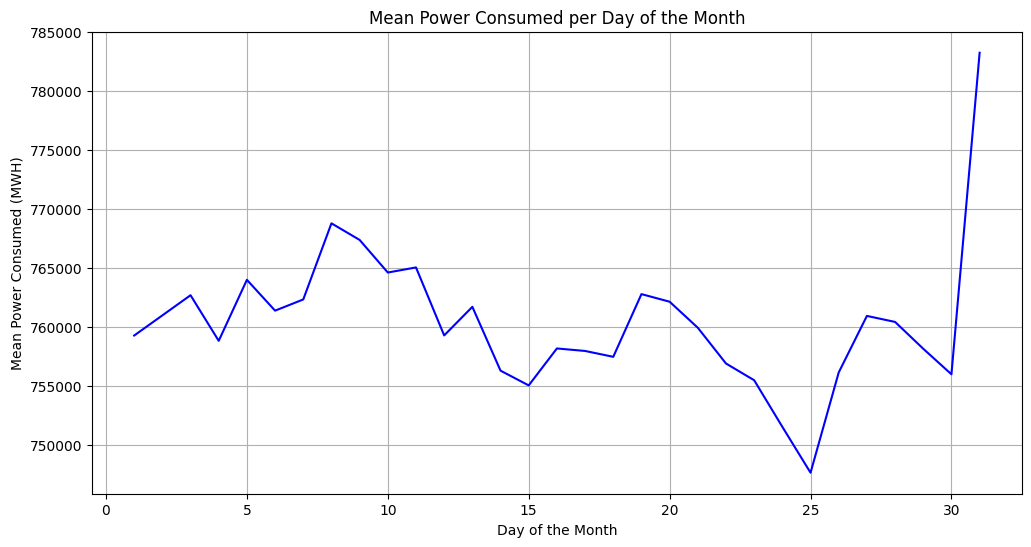

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(mean_energy_by_dom, color='blue')
plt.title('Mean Power Consumed per Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Mean Power Consumed (MWH)')
plt.grid(True)
plt.show()

From the above plot we can clearly see that the towards the end of the month around 25th day the energy consumption is the least whereas there is a huge spike around the last day of the month, probably due to repetitive periodic econimic activities such as pay days.

**7. weekofyear:** Some of the weeks in a year may have public holidays for festivals, seasons, school schedules and so on. This feature tries to capture such patterns for our predictive model.



In [44]:
#Group data by week of the year and calculate average power consumed

mean_energy_by_woy = df2.groupby('weekofyear')['Power_MWH'].mean()

mean_energy_by_woy

weekofyear
1     838388.000000
2     827670.063492
3     817830.857143
4     821807.920635
5     818582.317460
6     825850.968254
7     791542.777778
8     775613.206349
9     768398.428571
10    744079.174603
11    716335.444444
12    712360.269841
13    697331.920635
14    676909.587302
15    650348.682540
16    642618.984127
17    649209.095238
18    650073.238095
19    646387.841270
20    675000.492063
21    719892.555556
22    775323.238095
23    738065.793651
24    787619.444444
25    860579.111111
26    848912.253968
27    895575.852459
28    919534.936508
29    934570.054545
30    898650.476190
31    879312.133333
32    877144.910714
33    849762.125000
34    823629.410714
35    817439.535714
36    813185.303571
37    747762.125000
38    723829.482143
39    683497.500000
40    674679.482143
41    653332.589286
42    648102.232143
43    653205.500000
44    652383.285714
45    682148.767857
46    695528.160714
47    702242.785714
48    725953.589286
49    756981.946429
50    805

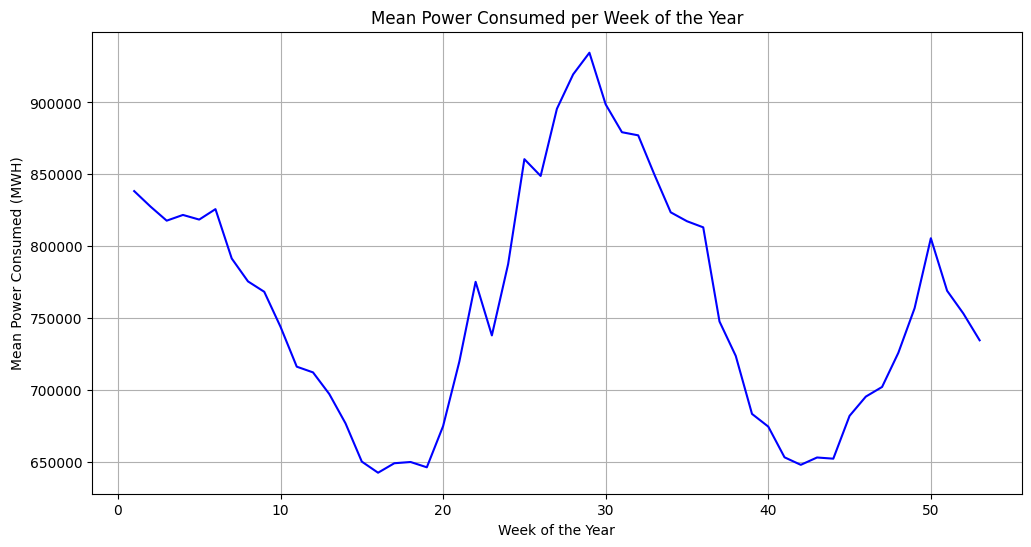

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(mean_energy_by_woy, color='blue')
plt.title('Mean Power Consumed per Week of the Year')
plt.xlabel('Week of the Year')
plt.ylabel('Mean Power Consumed (MWH)')
plt.grid(True)
plt.show()

From the above stats and graphs we can clearly see that there are significant peaks and dips for different weeks of the year, which gives us the valdi statistical reasoning for us to choose this feature as part of our predictive model.

**Now that we have successfully extracted all meaningful features and also backed them with statistical reasoning, we can move on to building a baseline predictive model for our problem statement.**

## Baseline Model

In this section, we will evaluate the various possible parametric and machine learning/non-machine learning models that we can use as a baseline model for our power consumption prediction. We will then go on to actually build the model, train it and evaluate it using MAE (Mean Absolute Error) and MAPE (Mean Absolute Percentage Error) for the test set.

Before we get started, let us split our dataframe `df2` into train set and test set. For our use case, will use 80% of the data as train set and remaining 20% as test set.

In [46]:
from sklearn.model_selection import train_test_split

#sort by date so that first 80% of the dates can be train set and remaining test set
df2 = df2.sort_index()

X = df2.drop(columns=['Power_MWH'])
y = df2['Power_MWH']

#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) #shuffle set to false for time series

# Display the shapes to verify the split
print("Training set shape (X_train):", X_train.shape)
print("Training set shape (y_train):", y_train.shape)
print("Test set shape (X_test):", X_test.shape)
print("Test set shape (y_test):", y_test.shape)

Training set shape (X_train): (2500, 7)
Training set shape (y_train): (2500,)
Test set shape (X_test): (626, 7)
Test set shape (y_test): (626,)


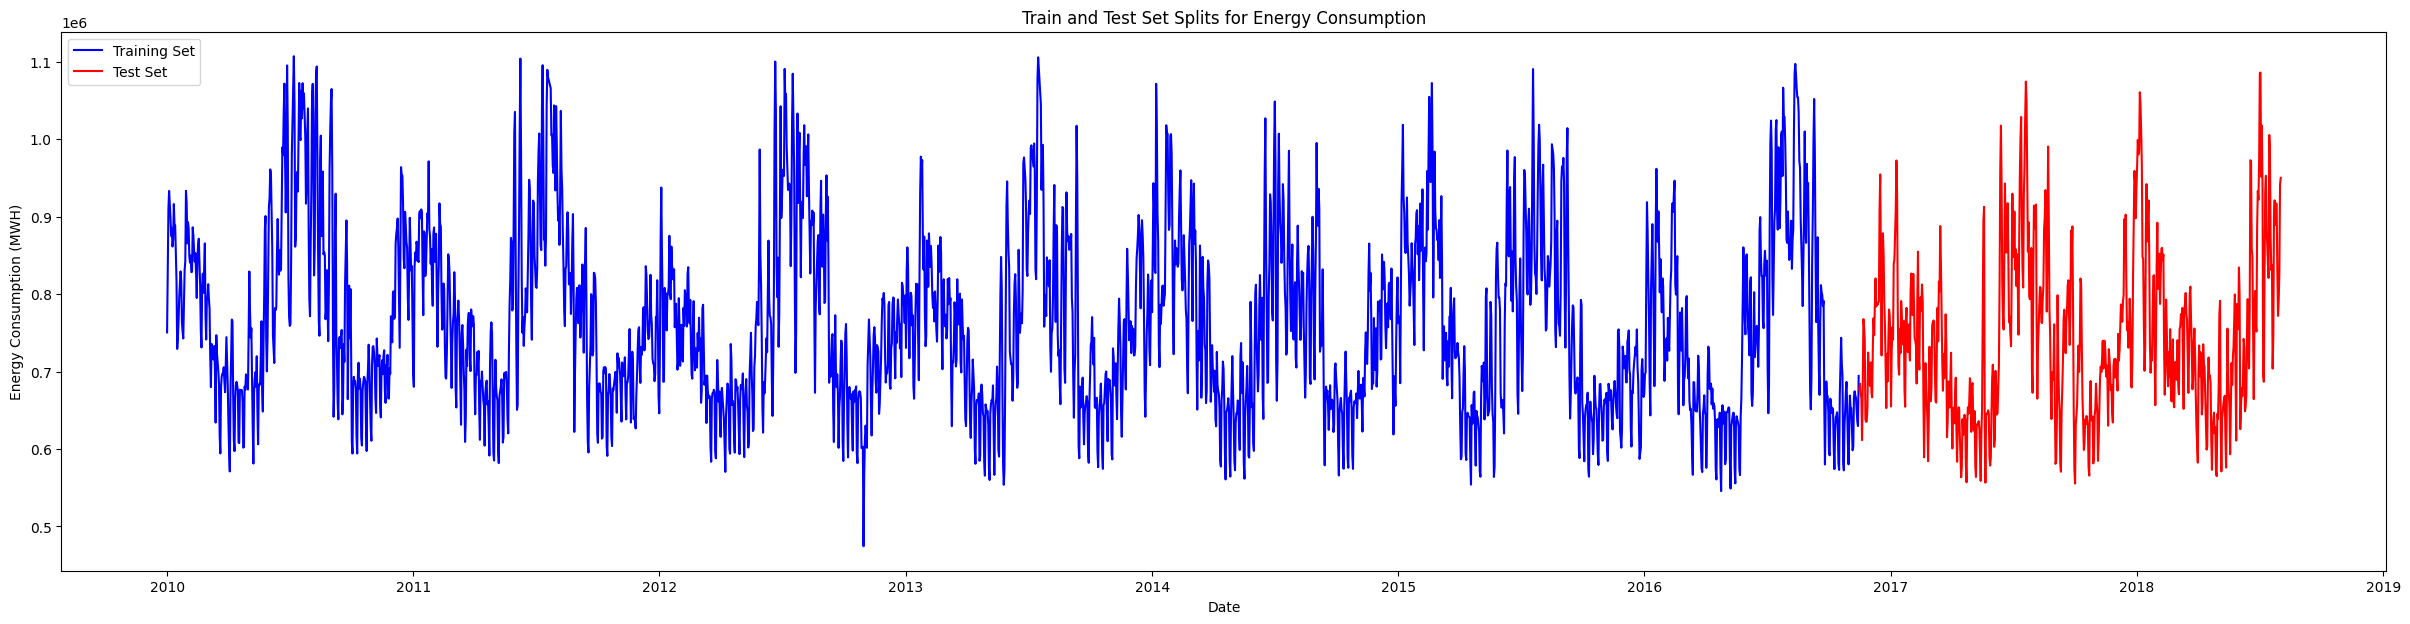

In [47]:
import matplotlib.pyplot as plt

#Plot the training set and test set
plt.figure(figsize=(30, 7))
plt.plot(X_train.index, y_train, label='Training Set', color='blue')
plt.plot(X_test.index, y_test, label='Test Set', color='red')

plt.xlabel('Date')
plt.ylabel('Energy Consumption (MWH)')
plt.title('Train and Test Set Splits for Energy Consumption')
plt.legend()
plt.show()

Now that we have split our dataset into train and test sets and also visualized them, let us look at the various possible ways of predicting the power consumption for a future day.

**1. Naive Forecasting:** It is the simplest prediction model in time series problems. It only considers that the next value or future value is the same as the most recent observed value.

- It is based on the formula: `y(t+1) = y(t)`

  where `y(t+1)` is the next forecasted value and `y(t)` is the current observed value.

- Pro: It is well suited for time series that lack significant trends or seasonality.

- Con: If your time series has trends/seasonal variations, it won't account for it since it will blindly take the last observed value as the next future value. It doesn't use any features or factors to actually "learn" and predict the total power consumption for the day.

- Since our data does have persistent trend and seasonality as determined by the time series decomposition earlier, we will not choose this approach for our baseline model as it will not account for our trend and seasonality.


**2. Moving Average:** This technique essentially makes use of a window size n(say 7) and uses the average of those last n values to predict the next future value.

- Pro: Useful for smoothing out short-term fluctuations and highlighting longer term trends.

- Con: Requires tuning of the window size by trial and error.

- Since this method takes into consideration the number of days equal to the window size and makes predictions based on it, it can be a good method our case to predict power consumption.

**3. ARIMA (Autoregressive Integrated Moving Average):** Combines autoregression, differencing and moving average for forecasting in time series data with persistent trends and seasonality.

- Pro: Can handle complex patterns in trends/seasonality and is well customizable.

- Con: might falter with highly non-linear data. It also requires parameter tuning through trial and error, such as selecting the order of autoregression (p), differencing (d) and moving average (q).

- Given our use case with trends and seasonality of power consumption, ARIMA is also a good choice to make an informed prediction on the power consumed on a particular day.


**Based on the detailed analysis above, I have opted for the moving average approach as the baseline model for our power consumption prediction problem.**
This is because of the following reasons:
- While the naive forecasting approach might be too simple and completely overlook underlying trends and seasonality, the ARIMA approach might be better suited for more complex patterns and relationships. Since this is our baseline model, it would be good to strike a balance between simplicity and complexity, thereby making moving average the ideal candidate.
- It can smooth out short-term fluctuations, thereby facilitating noise reduction.
- Moving average provides a quick initial assessment of the data without requiring complex parameter tuning, making it suitable for rapid prototyping and baseline comparison.

Now that we have selected the Moving Average as our baseline approach, let us go ahead and build the model. We will assume window size as 7 for this problem so that it can take the last one week data to predict the future power consumption.

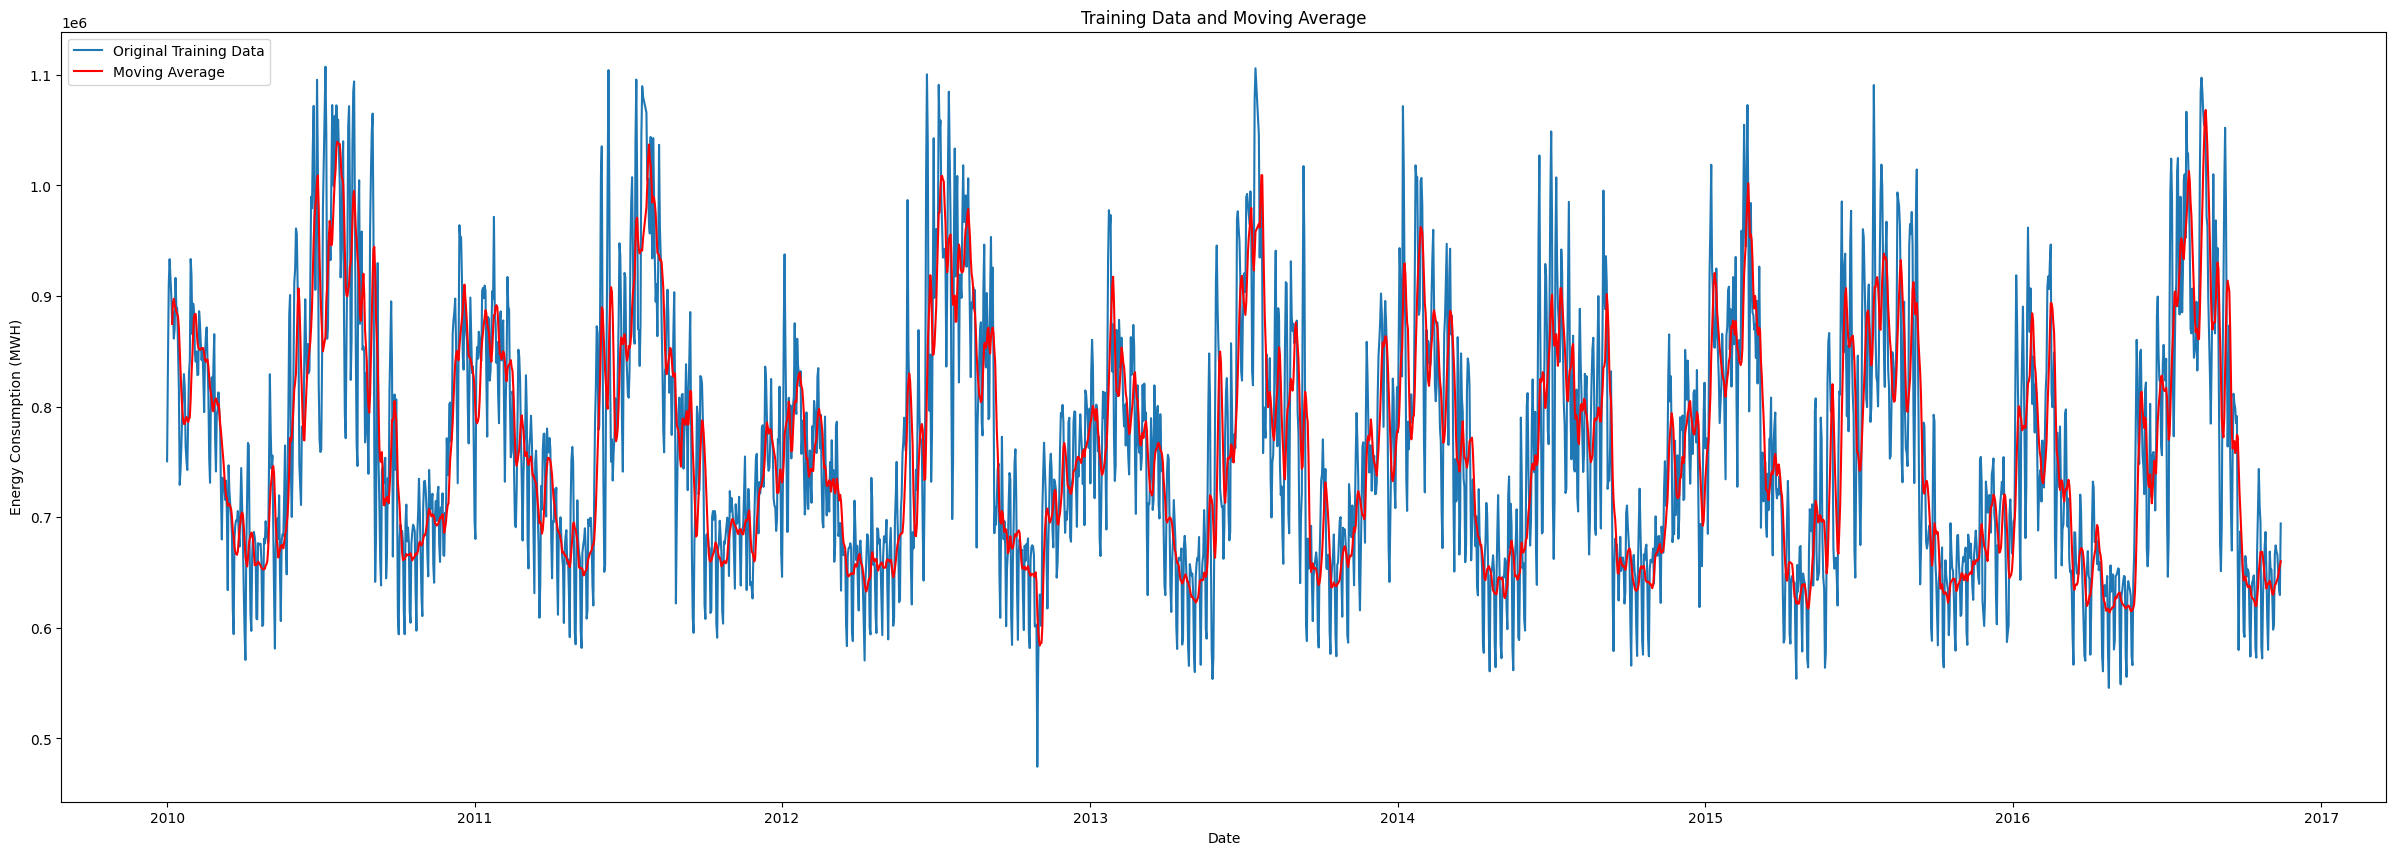

In [49]:
#Calculate moving average on train data
WINDOW_SIZE = 7
y_train_moving_avg = y_train.rolling(window=WINDOW_SIZE).mean()

#Drop NaN values - Moving average will produce NaN values for first 7 rows since they do now have requisite window size
y_train_moving_avg = y_train_moving_avg.dropna()
X_train_moving_avg = X_train.loc[y_train_moving_avg.index]

#Visualize train data against moving average train data
plt.figure(figsize=(30, 10))
plt.plot(y_train.index, y_train, label='Original Training Data')
plt.plot(y_train_moving_avg.index, y_train_moving_avg, label='Moving Average', color='red')
plt.title('Training Data and Moving Average')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (MWH)')
plt.legend()
plt.show()

The above plot looks pretty good on the train set. Let us now evaluate the same on the test set and see how good it performs.

In order to evaluate performance on the test set, we will use the following two metrics:

**1. Mean Absolute Error (MAE):** This will calculate the absolute difference between real and predicted values for all values in y_test and then take the mean of these values. It will provide a picture of the average MWh by which our prediction is off from the actual value.

**2. Mean Absolute Percentage Error (MAPE):** This will take the absolute difference of true and predicted value, multiply by 100 and divide by the true value for each value in `y_test`. It will then take the mean of all such computed values to give an average percentage by which the predicted values are off from the true values.


In [50]:
from sklearn.metrics import mean_absolute_error

y_pred_test = [] #this array will store the predicted values

#Start with the last n (n = window size) values from the training set to predict first value in test set
rolling_window = list(y_train[-WINDOW_SIZE:])

#predict each test point by updating the rolling window constantly
for true_value in y_test:
    #Calculate the current moving average
    current_moving_avg = np.mean(rolling_window)
    y_pred_test.append(current_moving_avg)

    #Update the rolling window
    rolling_window.pop(0) #remove the left most value
    rolling_window.append(true_value) #add the next value from the test set

y_pred_test = pd.Series(y_pred_test, index=y_test.index)

# Calculate MAE and MAPE for the test set
mae_test = round(mean_absolute_error(y_test, y_pred_test),2)
mape_test = round((np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100),2)

op = {
    'Mean Absolute Error (MAE)': mae_test,
    'Mean Absolute Percentage Error (MAPE)': mape_test
}
print(op)

{'Mean Absolute Error (MAE)': 59430.31, 'Mean Absolute Percentage Error (MAPE)': 7.93}


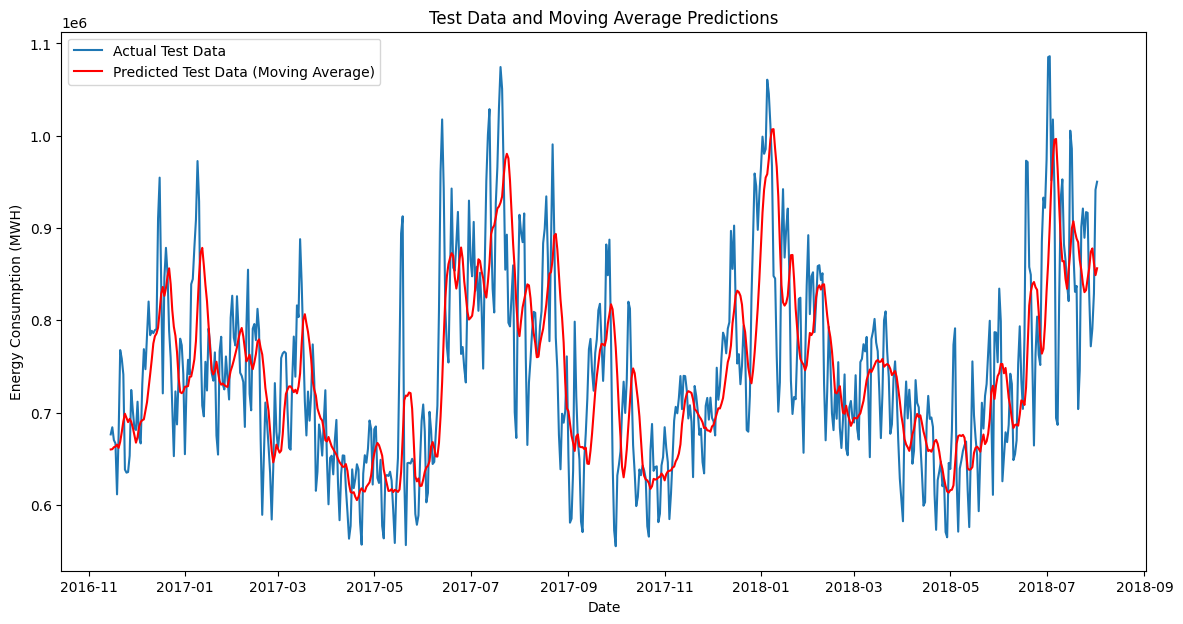

In [51]:
# Visualize the predictions
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Test Data')
plt.plot(y_test.index, y_pred_test, label='Predicted Test Data (Moving Average)', color='red')
plt.title('Test Data and Moving Average Predictions')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (MWH)')
plt.legend()
plt.show()

From the above results, we can make the following conclusions:

- Visually the predicted values using moving average seem pretty close to the true values in the plot.
- The mean absolute error is rounded to two decimal places and is equal to 59430.31, which seems like a high number, but is actually reasonable given that our `Power_MWH` has a range between 35486.00 MWh and 1247699.00 MWh.
- The mean absolute percentage error is 7.93%, which is fairly good for our use case. It means that on average our prediction might be off by 7.93% from the true value.
- Limitation: The main limitation with this model is that in order to make an effective prediction, it will need the 7 previous days power consumption values, which may not always be available. It does not really draw relationships between the various features extracted in order to make more informed predictions.

## ML Models against the Baseline model



In this section, we will discuss the various Machine Learning models that we can build to beat the performance of the moving average baseline model.

1. **Linear Regression:** It is a simple machine learning model that assumes a linear relationship between the input feature variables and the output target label. It attempts to fit the data points in a straight line.
  - Pros:
    - Simple and easy to interpret.
    - Fast to train and make predictions.
    - Can perform well with linearly separable data.
  
  - Cons:
    - Assumes a linear relationship between features and target so it can't perform well with non-linear data and complex relationships between the features.
    - It is quite sensitive to outliers.
  - Potential Gain: It might provide quick insights and a baseline understanding of the relationship between features and target. This will actually take the features into account and hence will be more credible than the moving average model.
  - Potential Aspect to Suffer: May not be able to capture complex or non-linear patterns in the data.
2. **Decision Tree:** It is a machine learning model that splits data into branches based on feature values, making decisions at each node to arrive at the final prediction. It makes use of entropy and information gain in order to achieve this.
  - Pros:
    - Can capture non-linear relationships unlike Linear regression.
    - Handles categorical features well. We have quite a few of them in our dataset after feature extraction.
  - Cons:
    - It is prone to learning the categorical values and decisions too well and causing overfitting.
  - Potential Gain: Ability to capture non-linear relationships over and above linear regression model.
  - Potential Aspect to Suffer: Overfitting if not properly tuned.
3. **Random Forest:** This ML model divides the data into multiple subsets and creates multiple decision trees for them. It combines the outputs from all these trees to arrive at the final prediction.
  - Pros:
    - Reduces overfitting by averaging multiple decision trees. This deals with the problem of overfitting in decision tree models mentioned above.
    - Handles non-linear relationships well. So it's better than linear regression too.
    - It is robust against outliers.
  - Cons:
    - Might take longer training time due to creation of subsets and decision trees.
  - Potential Gain: Improved accuracy by reducing overfitting problem of decision trees and also well fit to learn from complex non-linear relationships.
  - Potential Aspect to Suffer: Increased computational cost and complexity.
4. **XGBoost (Extreme Gradient Boosting):** powerful machine learning algorithm that uses gradient boosting for improved accuracy and efficiency in predictive modeling.
  - Pros:
    - Enhanced accuracy due to boosting.
    - Handles missing values well.
    - Can handle large datasets efficiently.
  - Cons:
    - More complex to tune with many hyperparameters.
    - Consequently longer training time.
  - Potential Gain: High accuracy, robustness.
  - Potential Aspect to Suffer: Increased training complexity and time.

**Based on the detailed analysis of the pros and cons of various ML models above, I have opted for the Random Forest model in order to predict power consumption for a day in the future.**

I followed the elimination method to arrive at this decision. Few of the reasons for my selection are as follows:

- The linear regression model is not suitable for complex relationships between features, so I eliminated that. Further, the decision tree algorithm causes overfitting tendency, so I eliminated that as well. Since the Random Forest model overcomes both of the mentioned problems, I chose it as a prospective option.
- It does not need extensive hyperparameter tuning like the XGBoost algorithm. This would mean lower computational costs and training times.
- XGBoost is well suited for large datasets which have missing values. Our dataset is quite small and we did not have any missing values. So we don't really need a complex XGBoost model for our dataset.
- Thus, Random Forest model seemed to provide a good balance between complexity and performance, thereby making it the best suited option for our use case.


Let us now go ahead and build the Random Forest model, train it and evaluate it.

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_test_rf = rf_model.predict(X_test)

# Calculate MAE and MAPE for Random Forest on test data
mae_test_rf = round(mean_absolute_error(y_test, y_pred_test_rf),2)
mape_test_rf = round((np.mean(np.abs((y_test - y_pred_test_rf) / y_test)) * 100),2)

op = {
    'Mean Absolute Error (MAE)': mae_test_rf,
    'Mean Absolute Percentage Error (MAPE)': mape_test_rf
}
print(op)

{'Mean Absolute Error (MAE)': 75510.41, 'Mean Absolute Percentage Error (MAPE)': 9.87}


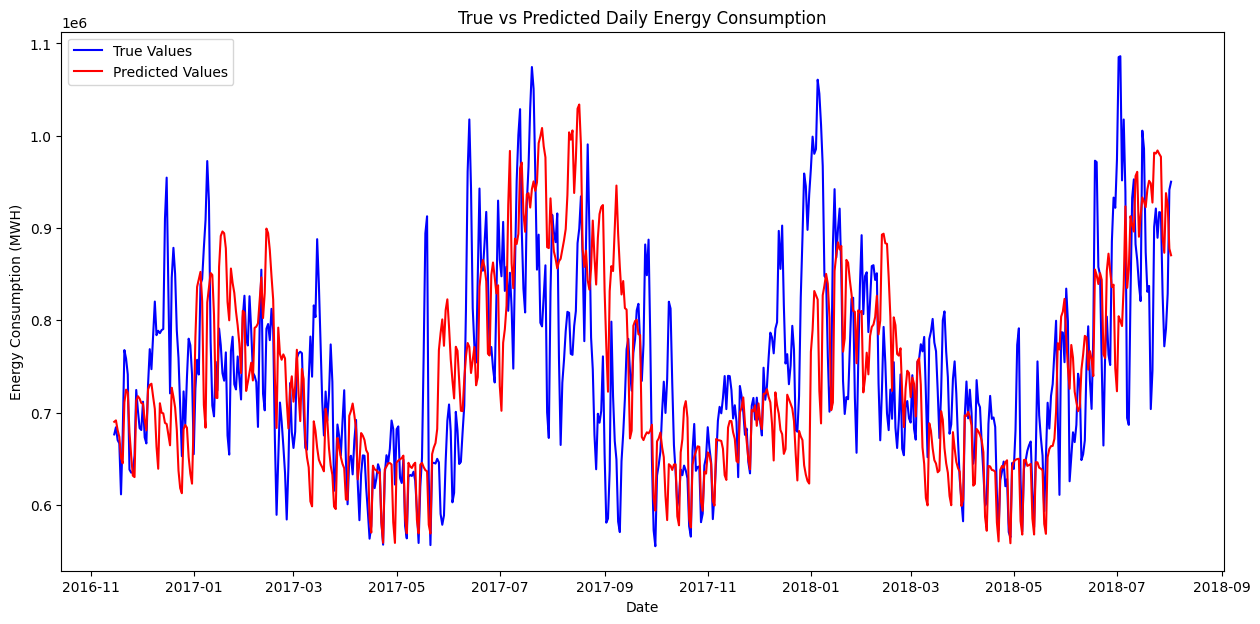

In [53]:
# Plot the true vs predicted values for the test set
plt.figure(figsize=(15, 7))
plt.plot(y_test.index, y_test, label='True Values', color='blue')
plt.plot(y_test.index, y_pred_test_rf, label='Predicted Values', color='red')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (MWH)')
plt.title('True vs Predicted Daily Energy Consumption')
plt.legend()
plt.show()

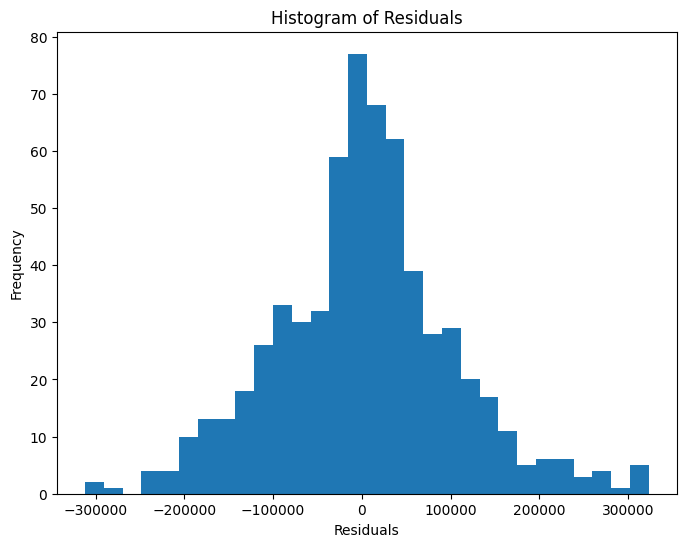

In [54]:
# Calculate residuals
residuals = y_test - y_pred_test_rf

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

Plotting a histogram of the residuals such as the one above allows us to examine their distribution.
A normal distribution of residuals centered around zero indicates that the model's predictions are
unbiased and have constant variance. These models are well balanced. However, if the histogram
shows skewness or significant deviations from normality, it suggests that the model may have biases
or inaccuracies.
From the histogram above, it is evident that we have an extremely good normal distribution,
thereby confirming that our model is very well balanced and has very negligible bias. It is therefore
an extremely good fit.

From the above results and visualizations, we can infer the following:

- Visually the predicted values by our random forest model seem fairly close to the true values in the plot, although not as close as the moving average.
- The mean absolute error is rounded to two decimal places and is equal to 75510.41, which is higher then our moving average model's MAE of 59430.31.  However it is still actually reasonable given that our `Power_MWH` has a range between 35486.00 MWh and 1247699.00 MWh.
- The mean absolute percentage error is 9.87 which is higher than moving average model's MAPE of 7.93%. It is still a fairly good MAPE value for our use case. It means that on average our prediction might be off by 9.87% from the true value.
- **The main advantage of our Random Forest model is that it actually draws relationships between the features and makes more informed predictions. It can practically make a prediction for any day in the future, thereby making it our best performing and most balanced model.**




## Make Predictions

In this last section, let us make some predictions using our random forest model.

Let us functionise this part so that we can use it in the future as well to make predictions.

In [55]:
def predict_energy_consumption(date, model):
    """
    This function will predict energy consumption for a given date using a pre-trained model

    Parameters:
    - date: The future date for prediction (string in 'YYYY-MM-DD' format)
    - model: The pre-trained machine learning model

    Returns:
    - Predicted energy consumption for the given date
    """
    # Create a DataFrame for the future date
    future_df = pd.DataFrame({'Datetime': [pd.to_datetime(date)]})
    future_df.set_index('Datetime', inplace=True)

    # Create the same features as in the training data
    future_df = feature_extraction_func(future_df)

    # Use the trained model to make a prediction for the future date
    future_prediction = model.predict(future_df)

    return future_prediction[0]

In [56]:
predicted_energy = predict_energy_consumption('2024-06-09', rf_model)

predicted_energy

712332.27

In [57]:
predicted_energy = predict_energy_consumption('2050-06-09', rf_model)

predicted_energy

701531.61

As we can see above, our random forest model is able to make energy consumption predictions for future dates.

## Limitations of our Random Forest Model

1. The Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE) is more than our baseline moving average model, which means that the accuracy is lesser.

2. The test set actually acts as our pseudo-future and our performance on this test set does not beat the baseline performance. So this means that our model is not able to accurately measure an energy consumption value in the pseudo future.

3. Though our model is well balanced and not biased, the MAE is 75510.41 which may particularly be very significant on days with lower power consumption.

##Steps to overcome the Limitations
1. Turn the problem into a supervised learning problem. For this, we will turn our dataset into windows of size 7 as we did with the moving average, and the 8th value will act as the predicted value. We can adapt the `series_to_supervised` function from [here](https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/) for this.
2. Then divide the X and y arrays into train and test set, with the test set coming after the train set.
3. Train the random forest model on the train set and evaluate it against the test set. The accuracy is expected to be higher.

In [72]:
# Define the series_to_supervised function
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values



The above function will take 4 inputs:
- `data`: the dataframe to convert to windowed time series
- `n_in`: the window size
- `n_out`: the horizon size, this can be single-step or multi-step
- `dropnan`: the function will make use of the pandas `shift()` method which is bound to create NaN values, this parameter specifies how to deal with those values

Now let us convert our `Power_MWH` column into a windowed series. For this we will take a backup of the indexes which store our datetime values. This will be used to plot the true and predicted values at the end.

In [73]:
from pandas import DataFrame, concat

daily_data = df2['Power_MWH']

#store datetime index
index = daily_data.index

#reshape daily_data
daily_data_values = daily_data.values.reshape(-1, 1)

#window the time series
n_in = 7  #window
n_out = 1  #horizon
supervised_data = series_to_supervised(daily_data_values, n_in=n_in, n_out=n_out)

# Separate features (X) and target (y)
X, y = supervised_data[:, :-1], supervised_data[:, -1]

In the above block of code, we will first store the `Power_MWH` values as a series in `daily_data`. We will then reshape this numpy array to a 2D array of shape (3126,1) using the reshape() method.

We will then use the series_to_supervised() method to convert our series into a windowed one and divide it into X and y.

In [170]:
X

array([[750586., 837421., 910921., ..., 915793., 900012., 875136.],
       [837421., 910921., 933310., ..., 900012., 875136., 885808.],
       [910921., 933310., 915793., ..., 875136., 885808., 861500.],
       ...,
       [921189., 889492., 917308., ..., 827898., 771910., 790978.],
       [889492., 917308., 916596., ..., 771910., 790978., 828938.],
       [917308., 916596., 827898., ..., 790978., 828938., 941539.]])

In [171]:
y

array([885808., 861500., 870458., ..., 828938., 941539., 950233.])

Let's split the dataset into test and train sets.

In [74]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print("Training set shape (X_train):", X_train.shape)
print("Training set shape (y_train):", y_train.shape)
print("Test set shape (X_test):", X_test.shape)
print("Test set shape (y_test):", y_test.shape)

Training set shape (X_train): (2495, 7)
Training set shape (y_train): (2495,)
Test set shape (X_test): (624, 7)
Test set shape (y_test): (624,)


Let us now build, train and evaluate our random forest model on this windowed time series.

In [75]:
#Build and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

#Evaluate the model
mae_test = mean_absolute_error(y_test, y_pred_test_rf)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test_rf) * 100

# Output the results
results = {
    'Mean Absolute Error (MAE)': round(mae_test, 2),
    'Mean Absolute Percentage Error (MAPE)': round(mape_test, 2)
}

print(results)

{'Mean Absolute Error (MAE)': 41322.94, 'Mean Absolute Percentage Error (MAPE)': 5.5}


In [77]:
y_test[:10], y_pred_test_rf[:10]

(array([670300., 666752., 611526., 675712., 767818., 758510., 741405.,
        638377., 635035., 635694.]),
 array([681087.07, 662906.68, 621575.01, 608044.23, 679804.24, 786416.27,
        747968.26, 723534.83, 626033.8 , 622258.96]))

Notice above how the predicted values are very close to our true values in the test set.

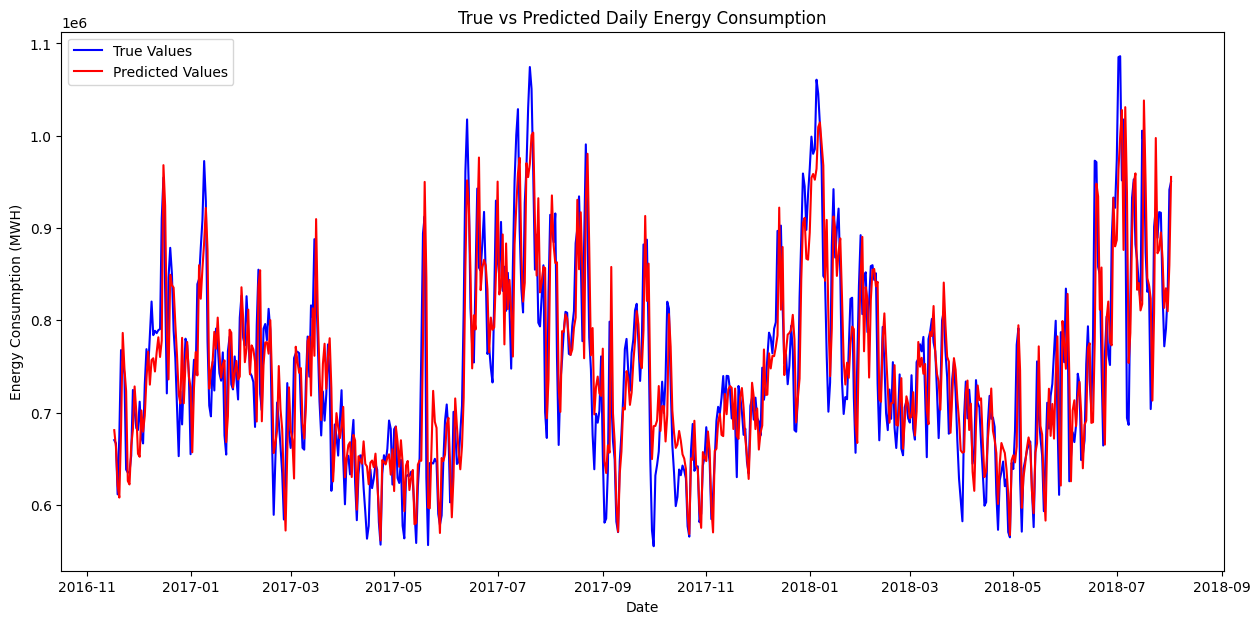

In [174]:
# Plot the true vs predicted values for the test set
plt.figure(figsize=(15, 7))
plt.plot(index[-len(y_test):], y_test, label='True Values', color='blue')
plt.plot(index[-len(y_test):], y_pred_test_rf, label='Predicted Values', color='red')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (MWH)')
plt.title('True vs Predicted Daily Energy Consumption')
plt.legend()
plt.show()

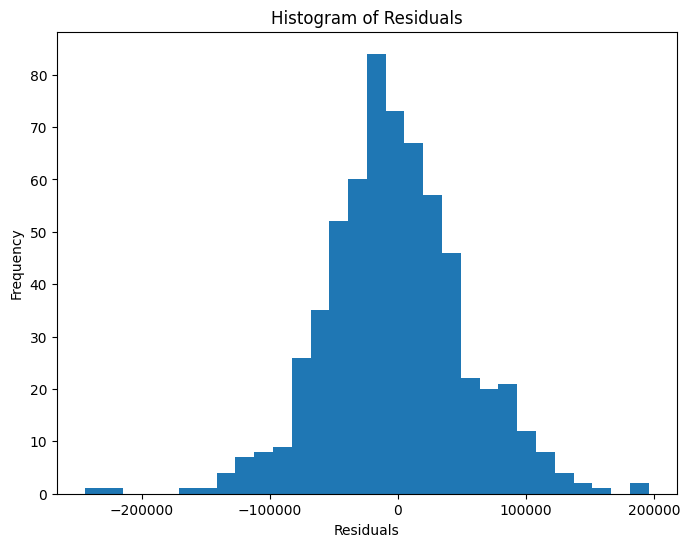

In [76]:
# Calculate residuals
residuals = y_test - y_pred_test_rf

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

**From the evaluation and visualisations, we can make the following deductions**:

1. The MAE is 41322.94 MWh, which is lesser than the baseline model's MAE of 59430.31, which means it is our most accurate model yet.
2. The MAPE is 5.5% as compared to our baseline performance of 7.93%, thereby reaffirming it's accuracy.
3. The predicted values are very close to the true values in the test set.
4. This is reaffirmed in the plot with test set and predicted set.
5. The residuals have a normal distribution, confirming that our model is well balanced and unbiased.

## Conclusion

At the outset, we set out to make predictions of daily power consumption based on a dataset with hourly power consumption readings from the year 2010 to 2018. Firstly, we carried out a comprehensive structured analysis with visualizations and statistical tests on our data. This helped us become one with the data and also helped us to clean it and perform noise reduction.

We then moved on to doing feature extraction by extracting meaningful features/information from our existing data. We also gave visual and statistical reasoning for choosing each of these features.

Once we had our final dataset `df2` ready, we went on to evaluating possibilities of baseline models and chose moving average model as our baseline and implemented it. We also discussed parametric models such as ARIMA.

We then tried to build a machine-learning model to try and beat the performance of our moving average model. As part of this, we chose Random Forest model as the most suitable model for our use case. We then implemented it and made predictions on energy consumption for random days in the future.

However, there were limitations with this form of implementation of the random forest model. In order to enhance our model accuracy, we decided to convert our problem into a supervised learning problem by converting our dataset into a windowed time series. We then fit the random forest model on this windowed series and achieved our best accuracy in terms of MAE and MSE. We confirmed this with predictions on the test set and visualisation plots with line graph and residuals histogram plots.

As improvements to this project, we might consider exploring parametric models like ARIMA and actually coding them and evaluating their accuracy. We can also leverage models like LSTM, dense networks and so on.

## References

1. Brownlee, J., 2020. Moving Average Smoothing for Data Preparation and Time Series Forecasting in Python. Available at: https://machinelearningmastery.com/moving-average-smoothing-for-data-preparation-and-time-series-forecasting-in-python/

2. Brownlee, J., 2020. Random Forest for Time Series Forecasting. Available at: https://machinelearningmastery.com/random-forest-for-time-series-forecasting/

In [103]:
!jupyter nbconvert --to pdf /content/Energy_Requirement_Prediction.ipynb

[NbConvertApp] WARNING | pattern '/content/Energy_Requirement_Prediction.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.ans